In [60]:
import os 
import re
from bs4 import BeautifulSoup

datasets = ["China_MotorBike", "Czech", "India", "Japan", "Norway", "United_States"]

num_D00 = [0, 0, 0, 0, 0, 0]
num_D10 = [0, 0, 0, 0, 0, 0]
num_D20 = [0, 0, 0, 0, 0, 0]
num_D40 = [0, 0, 0, 0, 0, 0]
other = [0, 0, 0, 0, 0, 0]
empty = [0, 0, 0, 0, 0, 0]

china_motorbike = [0, 0, 0, 0, 0]
czech = [0, 0, 0, 0, 0]
india = [0, 0, 0, 0, 0]
japan = [0, 0, 0, 0, 0]
norway = [0, 0, 0, 0, 0]
united_states = [0, 0, 0, 0, 0]

countrie_image_size_count = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
image_sizes_country = ['(512.0, 512.0)', '(600.0, 600.0)', '(720.0, 720.0)', '(540.0, 540.0)', '(1080.0, 1080.0)', '(1024.0, 1024.0)', '(3643.0, 2041.0)', '(4040.0, 2035.0)', '(3650.0, 2044.0)', '(640.0, 640.0)']


countries_track = [china_motorbike, czech, india, japan, norway, united_states]

num_classes_per_image = [[], [], [], [], [], []]

bb_sizes = [[], [], [], [], [], []]

image_sizes = [[], [], [], [], [], []]

def getWidthHeight(data): 


    ls = re.split("<|>", str(data.findAll("size")))

    wi = ls.index("width")+1
    hi = ls.index("height")+1

    
    image_width = ls[wi]
    image_height = ls[hi]

    return float(image_width), float(image_height)

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def add_to_country(country: int, object: int): 

    country_list = countries_track[country]
    country_list[object] += 1

    
    

for dataset in datasets: 

    dataset_index = datasets.index(dataset)
    print(dataset_index)

    for filename in os.listdir("/Users/jonasolsen/Documents/Skole/IIkt/4_semester/TDT4265-DatasynOgDypLæring/Øvinger/repo/TDT4265_StarterCode/ultralytics/datasets/"+dataset+"/train/annotations/xmls"):
        

        with open("/Users/jonasolsen/Documents/Skole/IIkt/4_semester/TDT4265-DatasynOgDypLæring/Øvinger/repo/TDT4265_StarterCode/ultralytics/datasets/"+dataset+"/train/annotations/xmls/"+filename, 'r') as f:
            data = f.read()

        

        bs_data = BeautifulSoup(data, "xml")

        bs_classes = bs_data.findAll("name")

        if len(bs_classes) == 0: 
            empty[dataset_index] += 1


        bs_boundingbox = bs_data.findAll("bndbox")

        num_classes_per_image[dataset_index].append(len(bs_classes))

        image_bb_size = []

        image_widht, image_height = getWidthHeight(bs_data)

        size_index = image_sizes_country.index(f'({image_widht}, {image_height})')

        countrie_image_size_count[dataset_index][size_index] += 1
        image_sizes[dataset_index].append((image_widht, image_height))

        for c, bb in zip(bs_classes, bs_boundingbox): 

            class_string = re.split("<|>", str(c))[2]


            if class_string == "D00": 
                class_string = "0"
                num_D00[dataset_index] += 1

                add_to_country(dataset_index, 0)

                


            elif class_string == "D10": 
                class_string = "1"
                num_D10[dataset_index] += 1

                add_to_country(dataset_index, 1)

                

            elif class_string == "D20": 
                class_string = "2"
                num_D20[dataset_index] += 1

                add_to_country(dataset_index, 2)

                


            elif class_string == "D40": 
                class_string = "3"
                num_D40[dataset_index] += 1

                add_to_country(dataset_index, 3)

                
                
            else: 
                other[dataset_index] += 1

                add_to_country(dataset_index, 4)

               

                continue

            
            bb_list_temp = [float(x) for x in re.split("<|>", str(bb)) if is_number(x)] ## xmin ymin xmax ymax 
            xwidth = ((bb_list_temp[2]) - (bb_list_temp[0]))
            yheight = ((bb_list_temp[3]) - (bb_list_temp[1]))

            xmid = ((bb_list_temp[2]) + (bb_list_temp[0]))/2
            ymid = ((bb_list_temp[3]) + (bb_list_temp[1]))/2

            

            xwidth /= image_widht
            yheight /= image_height
            xmid /= image_widht
            ymid /= image_height

            image_bb_size.append((xwidth * yheight))

            
        
        bb_sizes[dataset_index].append(image_bb_size)

        
         
        

0
1
2
3
4
5


[0 1 2 3 4]


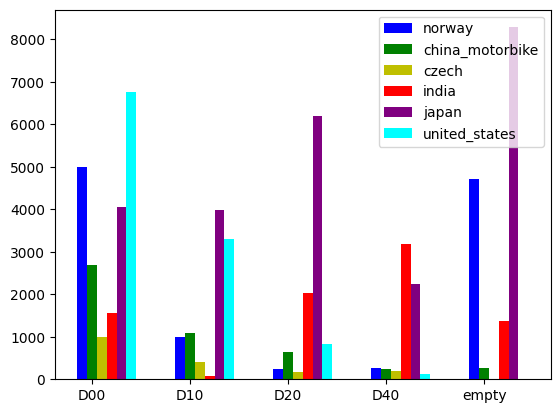

In [5]:
## number of instances for each class
import matplotlib.pyplot as plt
import numpy as np

labels = ["D00", "D10", "D20", "D40", "empty"]

ind = np.arange(5)
print(ind)
width = 0.1

norbar = plt.bar(ind, norway, width, color="b")
chinabar = plt.bar(ind + width, china_motorbike, width, color="g")
czbar = plt.bar(ind + 2*width, czech, width, color="y")
indiabar= plt.bar(ind + 3*width, india, width, color="r")
japanbar= plt.bar(ind + 4*width, japan, width, color="purple")
usbar = plt.bar(ind + 5*width, united_states, width, color="cyan")

plt.xticks(ind+width,["D00", "D10", "D20", "D40", "empty"])
plt.legend((norbar, chinabar, czbar, indiabar, japanbar, usbar), ("norway", "china_motorbike", "czech", "india", "japan", "united_states"))
plt.show()


In [75]:

## Average number of classes per image 
import numpy as np 

avrages = []

for list in num_classes_per_image: 
    tot = np.sum(list)
    dele = len(list)

    avrages.append(tot/dele)

print(avrages)

[2.4921598381385937, 0.616825733474726, 1.0644951985465871, 2.3561774224252807, 2.7518686435485846, 2.2921956295525496]


[[[0.06328582763671875, 0.036144256591796875], [0.00897216796875, 0.025177001953125, 0.020263671875], [0.32358551025390625], [0.09332275390625, 0.02667236328125, 0.01035308837890625, 0.016689300537109375, 0.01666259765625, 0.001888275146484375, 0.0215301513671875, 0.03421783447265625], [0.09746551513671875], [0.07602310180664062], [0.08326339721679688, 0.40341949462890625], [0.0098419189453125, 0.3397216796875, 0.03055572509765625], [0.17738723754882812], [0.06771087646484375], [0.021389007568359375, 0.00220489501953125], [0.0180511474609375, 0.079254150390625, 0.050384521484375], [0.6210746765136719], [0.009613037109375, 0.01050567626953125], [0.435791015625], [0.18908309936523438], [0.105987548828125], [0.33008575439453125, 0.0133514404296875, 0.0191650390625], [0.1975555419921875, 0.0860595703125], [0.07415771484375, 0.036163330078125, 0.00034332275390625], [0.022216796875, 0.1201629638671875], [0.07696533203125], [0.3842010498046875], [0.013973236083984375, 0.030975341796875], [0.0

/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_24844/13946189.py:12: RuntimeWarning: invalid value encountered in double_scalars
  bb_averages[index].append(np.sum(box)/len(box))


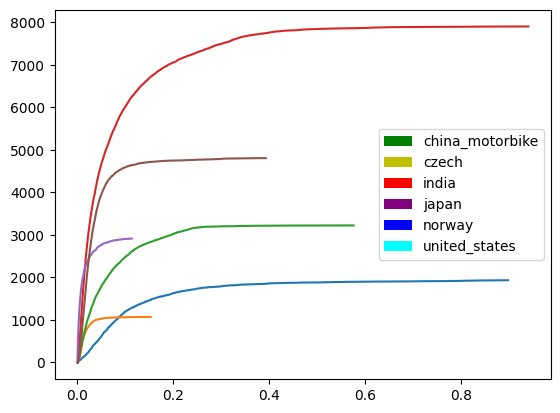

[0.1160477773356593, 0.006343448026720605, 0.027700215240380962, 0.057749154091941576, 0.004476164387297038, 0.03418878853587538]
[[0.04971504211425781, 0.018137613932291668, 0.32358551025390625, 0.02766704559326172, 0.09746551513671875, 0.07602310180664062, 0.24334144592285156, 0.1267064412434896, 0.17738723754882812, 0.06771087646484375, 0.011796951293945312, 0.049229939778645836, 0.6210746765136719, 0.010059356689453125, 0.435791015625, 0.18908309936523438, 0.105987548828125, 0.12086741129557292, 0.14180755615234375, 0.03688812255859375, 0.07118988037109375, 0.07696533203125, 0.3842010498046875, 0.022474288940429688, 0.0014209747314453125, 0.08382034301757812, 0.20363616943359375, 0.0766611099243164, 0.0097198486328125, 0.00446319580078125, 0.03258514404296875, 0.04959869384765625, 0.20429039001464844, 0.04355621337890625, 0.06429367065429688, 0.04904937744140625, 0.29886436462402344, 0.05305633544921875, 0.03623517354329427, 0.04370307922363281, 0.19298171997070312, 0.0994148254394

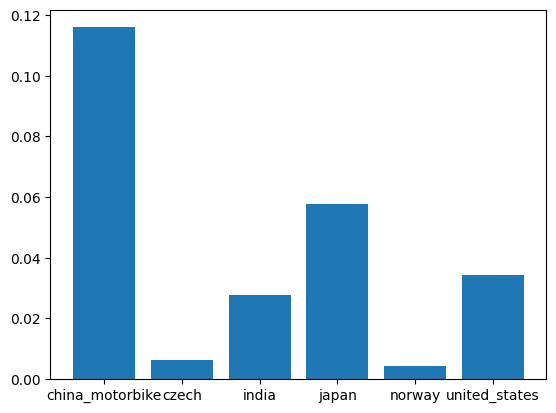

In [100]:
import math 
## sizes of bounding boxes 
bb_averages = [[], [], [], [], [], []]

avav = [0, 0, 0, 0, 0, 0]

print(bb_sizes)

for index, list in enumerate(bb_sizes):
    for box in list:  

        bb_averages[index].append(np.sum(box)/len(box))


for b in bb_averages: 
    print(len(b))

    x = np.linspace(0, len(b), len(b))

    plt.plot(np.sort(b), x)

plt.legend((chinabar, czbar, indiabar, japanbar, norbar, usbar), ("china_motorbike", "czech", "india", "japan", "norway", "united_states"))

plt.show()
for index, liste in enumerate(bb_averages) : 

    for i, el in enumerate(liste): 
        if math.isnan(el): 
            liste[i] = 0

    avav[index] += np.sum(liste)/len(liste)
    



avav = [np.sum(bb_averages[0])/len(bb_averages[0]), np.sum(bb_averages[1])/len(bb_averages[1]), np.sum(bb_averages[2])/len(bb_averages[2]), np.sum(bb_averages[3])/len(bb_averages[3]), np.sum(bb_averages[4])/len(bb_averages[4]), np.sum(bb_averages[5])/len(bb_averages[5])]
plt.bar(["china_motorbike", "czech", "india", "japan", "norway", "united_states"], avav)
print(avav)
print(bb_averages)

In [38]:
## Number of empyt images

print(empty)


5247


['(512.0, 512.0)', '(600.0, 600.0)', '(720.0, 720.0)', '(600.0, 600.0)', '(540.0, 540.0)', '(1080.0, 1080.0)', '(1024.0, 1024.0)', '(3643.0, 2041.0)', '(4040.0, 2035.0)', '(3650.0, 2044.0)', '(640.0, 640.0)']
[1977, 2829, 7706, 10187, 124, 48, 147, 2896, 4342, 923, 4805]


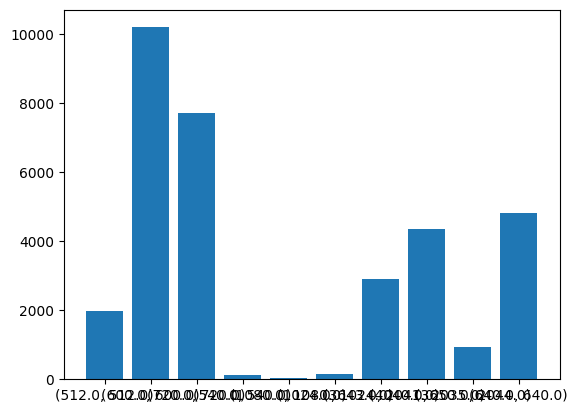

[[1977, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2829, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 7706, 0, 0, 0, 0, 0, 0, 0, 0], [0, 10187, 0, 0, 124, 48, 147, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 2896, 4342, 923, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4805]]


<Figure size 600x100 with 0 Axes>

In [47]:
## image sizes 

counter = []
labels = []
plot_labels = []

for image_size in image_sizes: 

    labels.append(list(str(x) for x in list(set(image_size))))



for el in labels :
    for e in el: 
        plot_labels.append(e)

print(plot_labels)


for index, liste in enumerate(image_sizes): 


    for size in set(liste): 
        counter.append(liste.count(size))

print(counter)

plt.bar(plot_labels, counter)
plt.show()

f = plt.figure()
f.set_figwidth(6)
f.set_figheight(1)


print(countrie_image_size_count)

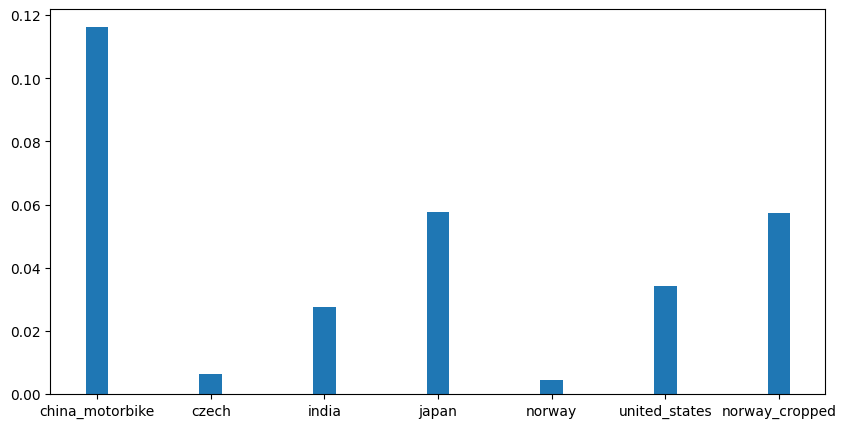

In [109]:

bb_average = 0
counter = 0

dummy = []

for filename in os.listdir("/Users/jonasolsen/Documents/Skole/IIkt/4_semester/TDT4265-DatasynOgDypLæring/Øvinger/repo/TDT4265_StarterCode/ultralytics/datasets/Norway_cropped/labels"):
        
    with open("/Users/jonasolsen/Documents/Skole/IIkt/4_semester/TDT4265-DatasynOgDypLæring/Øvinger/repo/TDT4265_StarterCode/ultralytics/datasets/Norway_cropped/labels/"+filename, 'r') as f:
        data = f.read()

    data = data.split()
    
    if len(data) > 0 : ## txt contains some bounding box
        bb_average += float(data[2])*float(data[3])
        counter += 1

    else: ## txt dosent contain bounding box 
        bb_average += 0


dummy = avav
dummy.append(bb_average / counter)
fig = plt.figure(figsize=(10,5))
plt.bar(["china_motorbike", "czech", "india", "japan", "norway", "united_states", "norway_cropped"], dummy, 0.2)
plt.show()



del dummy[-1]
    